<a href="https://colab.research.google.com/github/Do-Nhat-Truong/AI-VietNam-Module4-week3/blob/main/M04Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import matplotlib . pyplot as plt
import random
random.seed (0) # please do not remove this line
%matplotlib inline

def load_data_from_file ( fileName = "advertising.csv") :
  data = np . genfromtxt ( fileName , dtype = None , delimiter = ',', skip_header =1)
  features_X = data [: , :3]
  sales_Y = data [: , 3]
  N=len(features_X)
  features_X = np.hstack((np.ones((N, 1)), features_X))

  return features_X , sales_Y

features_X , sales_Y = load_data_from_file ()

In [176]:
!gdown 1r2Sb4ogBjRR1Wu28gy9X2D4WmOdFoICT

Downloading...
From: https://drive.google.com/uc?id=1r2Sb4ogBjRR1Wu28gy9X2D4WmOdFoICT
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 15.1MB/s]


In [177]:
features_X , _ = load_data_from_file ()
print(features_X [:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [178]:
_ , sales_Y = load_data_from_file ()
print( sales_Y . shape )

(200,)


In [179]:
def generate_random_value(bound = 10):
  # random.seed(0)
  return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
  individual = []
  # **************** your code here ****************
  individual= [generate_random_value(bound) for _ in range(n)]

  return individual


In [180]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [181]:
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss ( individual )
  fitness_value = 0
  # **************** your code here ****************
  fitness_value=1/(loss+1)
  return fitness_value

In [182]:
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


In [183]:
def crossover(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  for i in range(len(individual1)):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]
  # **************** your code here ****************


  return individual1_new, individual2_new

In [184]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [185]:
def mutate(individual, mutation_rate = 0.05):
  individual_m = individual.copy()
  for i in range(len(individual)):
      if random.random() < mutation_rate:
          individual_m[i] = generate_random_value()


  return individual_m

In [186]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [187]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [188]:
population = initializePopulation(100)
print(len(population))

100


In [189]:
def selection ( sorted_old_population , m = 100) :
  index1 = random.randint(0, m-1)
  while True:
      index2 = random.randint(0, m-1)
      if (index2 != index1):
          break

  individual_s = sorted_old_population[index1]
  if index2 > index1:
      individual_s = sorted_old_population[index2]

  return individual_s

In [202]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[1.8154599350582123, 3.2711816100224587, -0.05809120408806989, -4.130368049173545]


In [203]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population =[]# sorted_population[:elitism]
    while len(new_population) < m-elitism:
        # selection
        # **************** your code here ****************
        individual_s1 = selection(sorted_population,m)
        individual_s2 = selection(sorted_population,m)

        # crossover
        # **************** your code here ****************
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        # mutation
        # **************** your code here ****************
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        # add to new population
        new_population.append(individual_m1)
        new_population.append(individual_m2)
        # **************** your code here ****************


        #new_population.append(sorted_population[m-elitism])
        # **************** your code here ****************
    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    # **************** your code here ****************

    return new_population, compute_loss(sorted_population[m-1])

In [204]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [205]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
    # *********** your code here *************

  return losses_list

losses_list = run_GA()


Best loss: 1083.7042793062362 with chromsome:  [-4.708263066605517, 0.22643508129541412, -0.05868675696982684, -1.0225013908290503]
Best loss: 906.8217417483003 with chromsome:  [0.6635028283775757, 0.22643508129541412, -0.05868675696982684, -1.0225013908290503]
Best loss: 884.4404178433127 with chromsome:  [1.9572283850611039, 0.11117842831953939, -1.6659044867095407, 0.6623754519653313]
Best loss: 272.15511268177306 with chromsome:  [-4.708263066605517, 0.22643508129541412, -0.05868675696982684, -0.2871547058291335]
Best loss: 272.15511268177306 with chromsome:  [-4.708263066605517, 0.22643508129541412, -0.05868675696982684, -0.2871547058291335]
Best loss: 272.15511268177306 with chromsome:  [-4.708263066605517, 0.22643508129541412, -0.05868675696982684, -0.2871547058291335]
Best loss: 271.3199221957516 with chromsome:  [-4.708263066605517, 0.22643508129541412, -0.05868675696982684, -0.256935809872163]
Best loss: 98.88441963995818 with chromsome:  [-4.735864241505556, 0.0619738147740

Best loss: 1005.3304466557488 with chromsome:  [-3.5228464467240883, -0.19752716403078963, 1.6115126886701403, 0.03887869986717307]
Best loss: 742.2453968708872 with chromsome:  [-3.840524522629397, 0.07081876586600311, -1.3984315285648963, 1.041156011136638]
Best loss: 647.5215292170693 with chromsome:  [2.260949952739418, -0.03328152463884848, 0.973142915120293, -0.7360242386568594]
Best loss: 647.5215292170693 with chromsome:  [2.260949952739418, -0.03328152463884848, 0.973142915120293, -0.7360242386568594]
Best loss: 370.8154664487055 with chromsome:  [-3.9083165073307935, -0.04210921163649073, 0.003388384567237779, 0.8398775943576275]
Best loss: 220.3120160464781 with chromsome:  [-3.437715589197609, -0.03328152463884848, 0.973142915120293, -0.12782948138535644]
Best loss: 156.11215459401913 with chromsome:  [-4.556293134040815, 0.09121893496195521, -0.1820267908372386, -0.02213825645602796]
Best loss: 156.11215459401913 with chromsome:  [-4.556293134040815, 0.09121893496195521, -

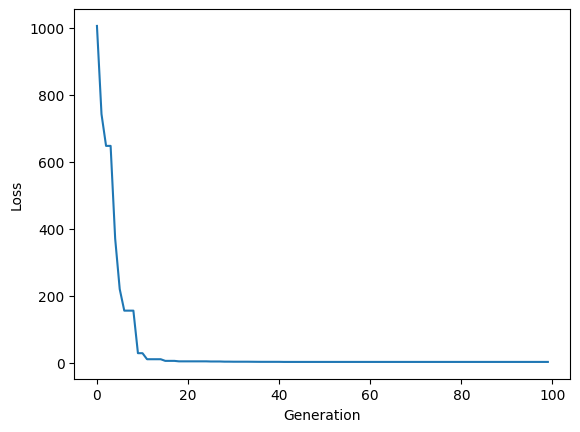

In [206]:
import matplotlib . pyplot as plt
import matplotlib . pyplot as plt
def visualize_loss ( losses_list ) :
  plt . plot ( losses_list )
  plt . xlabel ( "Generation" )
  plt . ylabel ( "Loss" )
  plt . show ()
# *********** your code here *************
losses_list = run_GA ()
visualize_loss ( losses_list )

[-3.3015059227089463, 0.2612468370921628, -0.09430754580701861, -1.1595502261383084]


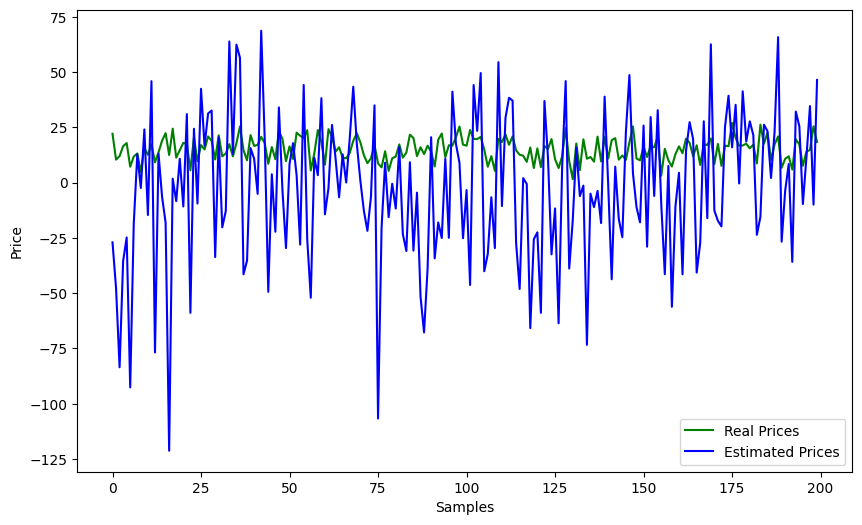

In [207]:
def visualize_predict_gt () :
  # visualization of ground truth and predict value
  sorted_population = sorted ( population , key = compute_fitness )
  print ( sorted_population [ -1])
  theta = np . array ( sorted_population [ -1])
  estimated_prices = []
  for feature in features_X :
    estimated_prices . append ( feature . dot ( theta ) )
  # ************* your code here *************
  fig , ax = plt . subplots ( figsize =(10 , 6) )
  plt . xlabel ( 'Samples')
  plt . ylabel ( 'Price')
  plt . plot ( sales_Y , c = 'green' , label = 'Real Prices')
  plt . plot ( estimated_prices , c = 'blue' , label ='Estimated Prices')
  plt . legend ()
  plt . show ()
visualize_predict_gt ()